In [5]:
from __future__ import absolute_import,division,print_function,unicode_literals
#importing the necessary libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import sys

# Add the directory containing the Python file to the `sys.path` list
sys.path.append("/IMP DOCUMENT/College material/SEM6/AIProject/Ozone-Prediction-AIProject/Support")

# Import the Python file
import LSTM_Model
import TsPreProcessing

In [6]:
data = pd.read_excel('Processed_Ashok Vihar 2018-2023.xlsx', sheet_name='Sheet1')
data.head()

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Toluene,Temp,RH,WS,WD,SR,BP,AT,RF,TOT-RF
0,01-02-2018 00:00,02-02-2018 00:00,226.33,444.46,35.58,78.55,68.37,39.14,13.46,1.4,...,None,None,66.03,0.58,206.68,169.44,906.67,21.85,None,0.0
1,02-02-2018 00:00,03-02-2018 00:00,181.87,351.86,30.51,54.36,69.02,48.97,11.03,0.96,...,None,None,72.23,0.57,179.94,112.76,914.63,18.86,None,0.0
2,03-02-2018 00:00,04-02-2018 00:00,152.29,304.47,24.34,43.35,67.12,48.15,14.95,0.87,...,None,None,67.5,0.51,153.99,119.74,910.2,17.62,None,0.0
3,04-02-2018 00:00,05-02-2018 00:00,172.53,301.08,22.14,45.92,63.98,42.82,13.45,0.88,...,2.48,None,67.16,0.63,205.84,138.62,914.95,16.59,None,0.0
4,05-02-2018 00:00,06-02-2018 00:00,210.9,372.96,36.44,55.32,83.17,39.78,16.52,1.04,...,3.13,None,64.28,0.48,168.1,94.98,902.22,15.95,None,0.0


In [7]:
# Convert the date column to datetime
from datetime import datetime
df = data.copy()
# datae
df['From Date'] = df['From Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['To Date'] = df['To Date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %H:%M'))
df['From Date'].min(), df['From Date'].max()
df = df.set_index('To Date')
df.drop(['From Date'], axis=1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Temp,RH,WS,WD,SR,BP,AT,RF,TOT-RF
To Date,,,,,,,,,,,,,,,,,,,,
2018-02-02,226.33,444.46,35.58,78.55,68.37,39.14,13.46,1.4,None,None,None,None,66.03,0.58,206.68,169.44,906.67,21.85,None,0.0
2018-02-03,181.87,351.86,30.51,54.36,69.02,48.97,11.03,0.96,None,None,None,None,72.23,0.57,179.94,112.76,914.63,18.86,None,0.0
2018-02-04,152.29,304.47,24.34,43.35,67.12,48.15,14.95,0.87,None,None,None,None,67.5,0.51,153.99,119.74,910.2,17.62,None,0.0
2018-02-05,172.53,301.08,22.14,45.92,63.98,42.82,13.45,0.88,2.79,0.69,2.48,None,67.16,0.63,205.84,138.62,914.95,16.59,None,0.0
2018-02-06,210.9,372.96,36.44,55.32,83.17,39.78,16.52,1.04,27.85,0.8,3.13,None,64.28,0.48,168.1,94.98,902.22,15.95,None,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1882 entries, 2018-02-02 to 2023-03-29
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    1882 non-null   object 
 1   PM10     1882 non-null   object 
 2   NO       1882 non-null   object 
 3   NO2      1882 non-null   object 
 4   NOx      1882 non-null   object 
 5   NH3      1882 non-null   object 
 6   SO2      1882 non-null   object 
 7   CO       1882 non-null   object 
 8   Ozone    1882 non-null   object 
 9   Benzene  1882 non-null   object 
 10  Toluene  1882 non-null   object 
 11  Temp     1882 non-null   object 
 12  RH       1882 non-null   object 
 13  WS       1882 non-null   object 
 14  WD       1882 non-null   object 
 15  SR       1882 non-null   object 
 16  BP       1882 non-null   object 
 17  AT       1882 non-null   object 
 18  RF       1882 non-null   object 
 19  TOT-RF   1882 non-null   float64
dtypes: float64(1), object(19)
memory u

In [9]:
df.drop(['Temp'], axis=1, inplace=True)
num_cols = df.columns
num_cols

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF',
       'TOT-RF'],
      dtype='object')

In [10]:
df = df.replace('None', np.nan)
# iterate through the columns and convert to float
for col in num_cols:
    df[col] = df[col].astype(float)


In [11]:
print("Rows  :  ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())

Rows  :   1882
Columns :  19

Features : 
 ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene', 'Toluene', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF']


In [12]:

print("\nMissing values : \n",df.isnull().any())


Missing values : 
 PM2.5       True
PM10        True
NO          True
NO2         True
NOx         True
NH3         True
SO2         True
CO          True
Ozone       True
Benzene     True
Toluene     True
RH          True
WS          True
WD          True
SR          True
BP          True
AT          True
RF          True
TOT-RF     False
dtype: bool


In [13]:
print("\nUnique values : \n",df.nunique())


Unique values : 
 PM2.5      1768
PM10       1838
NO         1513
NO2        1658
NOx        1666
NH3        1513
SO2        1448
CO          310
Ozone      1626
Benzene     809
Toluene    1492
RH         1560
WS          185
WD         1720
SR         1791
BP         1400
AT         1355
RF           40
TOT-RF       91
dtype: int64


# Visualizing The Data for Ashok Vihar

In [14]:
oz_data = df['Ozone']
oz_data.head()

To Date
2018-02-02      NaN
2018-02-03      NaN
2018-02-04      NaN
2018-02-05     2.79
2018-02-06    27.85
Name: Ozone, dtype: float64

<AxesSubplot:xlabel='To Date'>

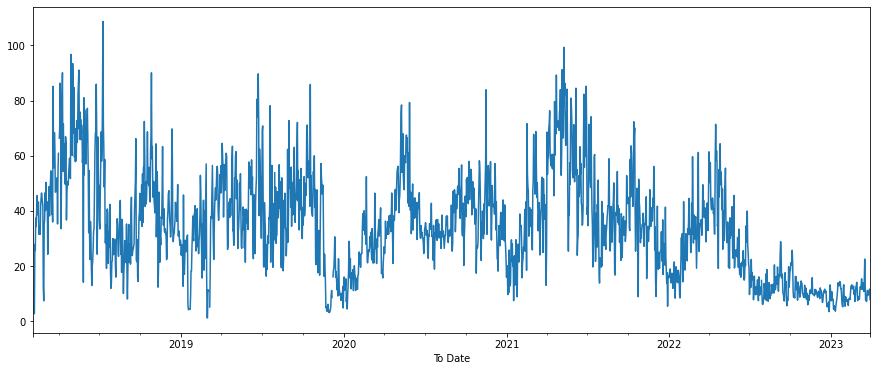

In [15]:
oz_data.plot(figsize=(15, 6))

In [16]:
import plotly.express as px
fig = px.line(oz_data, x=oz_data.index, y=oz_data.values, title='Ozone Concentration')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

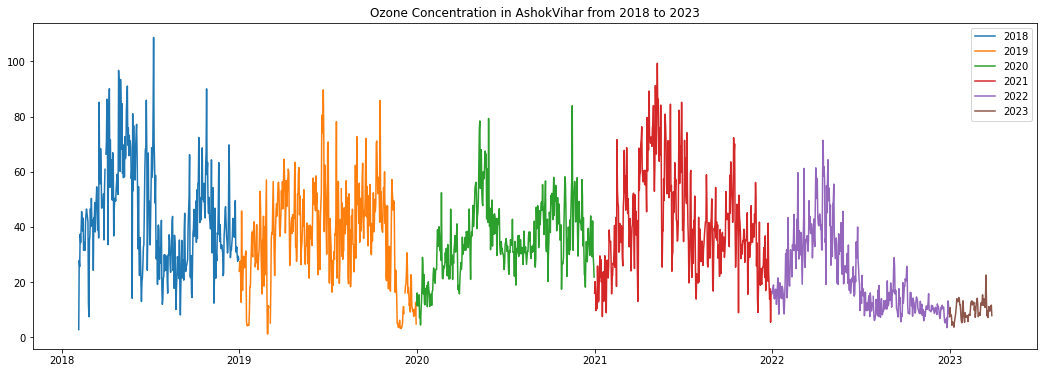

In [18]:

year = ['2018','2019','2020','2021','2022','2023']
# all plots in one figure
plt.figure(figsize=(18,6))
for i in year:
    df_year = df.loc[i]
    plt.plot(df_year['Ozone'],label=i)
plt.legend(loc='best')
plt.title('Ozone Concentration in AshokVihar from 2018 to 2023')
plt.show()

In [57]:
# i want to group by month
aq_df = df.copy()
aq_df['month'] = df.index.month
aq_df['year'] = df.index.year
aq_df['day'] = df.index.day
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,WS,WD,SR,BP,AT,RF,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,,,,
2018-02-02,226.33,444.46,35.58,78.55,68.37,39.14,13.46,1.40,NaN,NaN,...,0.58,206.68,169.44,906.67,21.85,NaN,0.0,2,2018,2
2018-02-03,181.87,351.86,30.51,54.36,69.02,48.97,11.03,0.96,NaN,NaN,...,0.57,179.94,112.76,914.63,18.86,NaN,0.0,2,2018,3
2018-02-04,152.29,304.47,24.34,43.35,67.12,48.15,14.95,0.87,NaN,NaN,...,0.51,153.99,119.74,910.20,17.62,NaN,0.0,2,2018,4
2018-02-05,172.53,301.08,22.14,45.92,63.98,42.82,13.45,0.88,2.79,0.69,...,0.63,205.84,138.62,914.95,16.59,NaN,0.0,2,2018,5
2018-02-06,210.90,372.96,36.44,55.32,83.17,39.78,16.52,1.04,27.85,0.80,...,0.48,168.10,94.98,902.22,15.95,NaN,0.0,2,2018,6


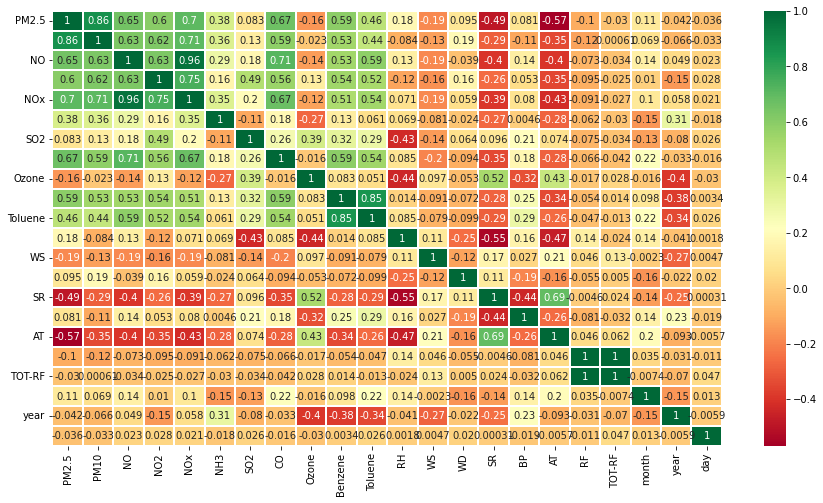

In [58]:
aq_corr = aq_df.corr(method='pearson')
g = sns.heatmap(aq_corr,annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

# LSTM Model Training for Ashok Vihar

In [59]:
# dropping the null values
aq_df.dropna(inplace=True)
aq_df.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
SO2        0
CO         0
Ozone      0
Benzene    0
Toluene    0
RH         0
WS         0
WD         0
SR         0
BP         0
AT         0
RF         0
TOT-RF     0
month      0
year       0
day        0
dtype: int64

In [60]:
aq_df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,WS,WD,SR,BP,AT,RF,TOT-RF,month,year,day
To Date,,,,,,,,,,,,,,,,,,,,,
2018-06-28,54.79,105.37,2.02,18.03,11.21,41.26,10.72,0.57,66.80,6.90,...,7.44,128.75,185.51,1026.38,30.72,0.0,0.3,6,2018,28
2018-06-29,27.03,49.54,2.43,11.14,7.91,40.55,5.39,0.49,45.97,4.95,...,7.44,128.77,153.63,1034.65,30.08,0.0,0.2,6,2018,29
2018-06-30,36.51,81.59,5.05,19.69,14.61,32.11,7.78,0.60,49.34,5.22,...,10.35,113.82,120.06,1027.61,30.99,0.0,0.2,6,2018,30
2018-07-01,34.98,99.12,7.28,35.91,25.06,33.95,6.65,0.71,36.35,3.77,...,15.04,90.13,142.97,1007.69,31.90,0.0,0.0,7,2018,1
2018-07-02,23.50,92.19,6.37,27.02,19.50,35.19,4.07,0.54,33.48,1.91,...,15.04,90.13,164.06,995.65,33.19,0.0,0.0,7,2018,2


In [61]:
# define the train and test data
x_train = aq_df[:'2022-01-01']
y_train = x_train['Ozone']
x_test = aq_df['2022-01-01':]
y_test = x_test['Ozone']
print(y_test)

To Date
2022-01-01    15.83
2022-01-02    17.62
2022-01-03    17.95
2022-01-04    18.98
2022-01-05    14.23
              ...  
2023-03-25     9.47
2023-03-26    10.29
2023-03-27    11.15
2023-03-28    11.66
2023-03-29     7.85
Name: Ozone, Length: 444, dtype: float64


In [62]:
# transforming and normalizing the data
train_norm = TsPreProcessing.Transform_Normalize(x_train['Ozone'])
test_norm = TsPreProcessing.Transform_Normalize(x_test['Ozone'])

[0.6104029]
[0.41658137]
[0.44793896]
[0.32706802]
[0.30036289]
Number of null values in norm =  1
[0.18183157]
[0.2081861]
[0.21304476]
[0.22820966]
[0.15827444]
Number of null values in norm =  1


In [63]:
print(train_norm.shape)
print(test_norm.shape)

(1243,)
(443,)


In [ ]:
n_steps = 15 #number of steps to look back
X_split_train, y_split_train = TsPreProcessing.split_sequence(train_norm, n_steps)
for i in range(len(X_split_train)):
    print(X_split_train[i], y_split_train[i])
n_features = 1 #number of features (in this case it is just the number of columns in the dataframe)
X_split_train = X_split_train.reshape((X_split_train.shape[0], X_split_train.shape[1], n_features))

In [65]:
X_split_test, y_split_test = TsPreProcessing.split_sequence(test_norm, n_steps)
for i in range(5):
    print(X_split_test[i], y_split_test[i])
n_features = 1
X_split_test = X_split_test.reshape((X_split_test.shape[0], X_split_test.shape[1], n_features))


[0.18183157 0.2081861  0.21304476 0.22820966 0.15827444 0.15356302
 0.16828622 0.20524146 0.19994111 0.12441107 0.18772085 0.21407538
 0.2656066  0.14914605 0.0721437 ] 0.18330388692579502
[0.2081861  0.21304476 0.22820966 0.15827444 0.15356302 0.16828622
 0.20524146 0.19994111 0.12441107 0.18772085 0.21407538 0.2656066
 0.14914605 0.0721437  0.18330389] 0.2396937573616019
[0.21304476 0.22820966 0.15827444 0.15356302 0.16828622 0.20524146
 0.19994111 0.12441107 0.18772085 0.21407538 0.2656066  0.14914605
 0.0721437  0.18330389 0.23969376] 0.19611307420494697
[0.22820966 0.15827444 0.15356302 0.16828622 0.20524146 0.19994111
 0.12441107 0.18772085 0.21407538 0.2656066  0.14914605 0.0721437
 0.18330389 0.23969376 0.19611307] 0.15871613663133097
[0.15827444 0.15356302 0.16828622 0.20524146 0.19994111 0.12441107
 0.18772085 0.21407538 0.2656066  0.14914605 0.0721437  0.18330389
 0.23969376 0.19611307 0.15871614] 0.2179034157832744


In [66]:
# import the fucntion for Support folder from the same directory
from LSTM_Model import build_lstm_model
n_steps = 15
n_features = 1
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_hidden_layers = 2
num_units_hidden_layers = 32
activation_function = 'tanh'
dropout_rate = 0.2

model = build_lstm_model(input_shape, num_lstm_units, num_hidden_layers, num_units_hidden_layers, dropout_rate)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [67]:
#  fit model
hist = model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)

Epoch 1/50
39/39 [==============================] - 4s 42ms/step - loss: 0.0568 - mae: 0.1905 - val_loss: 0.0244 - val_mae: 0.1334
Epoch 2/50
39/39 [==============================] - 1s 23ms/step - loss: 0.0182 - mae: 0.1043 - val_loss: 0.0163 - val_mae: 0.1063
Epoch 3/50
39/39 [==============================] - 2s 42ms/step - loss: 0.0149 - mae: 0.0946 - val_loss: 0.0106 - val_mae: 0.0775
Epoch 4/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0138 - mae: 0.0893 - val_loss: 0.0093 - val_mae: 0.0680
Epoch 5/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0131 - mae: 0.0874 - val_loss: 0.0095 - val_mae: 0.0693
Epoch 6/50
39/39 [==============================] - 0s 11ms/step - loss: 0.0124 - mae: 0.0850 - val_loss: 0.0092 - val_mae: 0.0640
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0120 - mae: 0.0837 - val_loss: 0.0099 - val_mae: 0.0701
Epoch 8/50
39/39 [==============================] - 0s 13ms/step - loss: 0.0119 - ma

In [68]:
yhat = model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
r2 = r2_score(y_split_test, yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 5ms/step
MSE: 0.00919
RMSE: 0.09585
R2: 0.76501


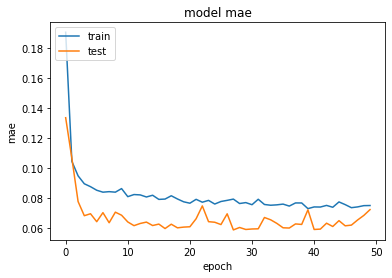

In [69]:
# summarize history for accuracy
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

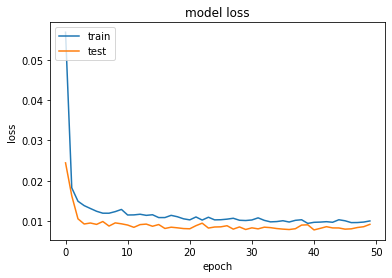

In [70]:
# Above, accuracy increase a lot in the last few epochs. Below, the loss gradually decrease. These are positive signs that our model is doing very good.

# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

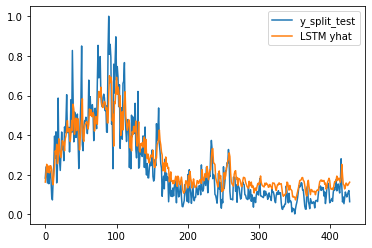

In [71]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(yhat, label='LSTM yhat')
plt.legend()

# Model Training for Ashok Vihar BiDirectional LSTM

In [72]:
from LSTM_Model import build_bidirectional_lstm_model
from keras.optimizers import Adam

n_steps = 10
n_features = 5
input_shape = (n_steps, n_features)
num_lstm_units = 64
num_dense_units = 50
dense_activation_function = 'tanh'
optimizer = Adam(lr=0.001)

B_model = build_bidirectional_lstm_model(input_shape, num_lstm_units, num_dense_units, dense_activation_function, optimizer)

#  fit model
hist = B_model.fit(X_split_train, y_split_train, validation_data=(X_split_test, y_split_test), epochs=50, verbose = 1)


Epoch 1/50


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



39/39 [==============================] - 4s 25ms/step - loss: 0.0262 - mae: 0.1231 - val_loss: 0.0136 - val_mae: 0.0955
Epoch 2/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0120 - mae: 0.0844 - val_loss: 0.0104 - val_mae: 0.0777
Epoch 3/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0112 - mae: 0.0807 - val_loss: 0.0100 - val_mae: 0.0760
Epoch 4/50
39/39 [==============================] - 0s 12ms/step - loss: 0.0108 - mae: 0.0790 - val_loss: 0.0092 - val_mae: 0.0695
Epoch 5/50
39/39 [==============================] - 0s 9ms/step - loss: 0.0106 - mae: 0.0781 - val_loss: 0.0089 - val_mae: 0.0668
Epoch 6/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0102 - mae: 0.0760 - val_loss: 0.0094 - val_mae: 0.0718
Epoch 7/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0102 - mae: 0.0762 - val_loss: 0.0092 - val_mae: 0.0707
Epoch 8/50
39/39 [==============================] - 0s 10ms/step - loss: 0.0099 - mae: 0.0750 - 

In [73]:
B_yhat = B_model.predict(X_split_test)
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_split_test, B_yhat)
print('MSE: %.5f' % mse)
rmse = sqrt(mse)
print('RMSE: %.5f' % rmse)
# R2 score
r2 = r2_score(y_split_test, B_yhat)
print('R2: %.5f' % r2)

14/14 [==============================] - 0s 6ms/step
MSE: 0.00803
RMSE: 0.08962
R2: 0.79455


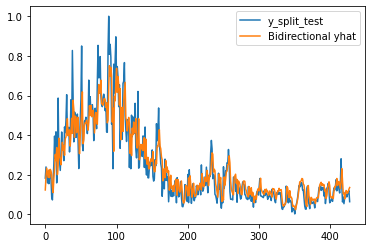

In [74]:
# plot yhat and y_split_test
plt.plot(y_split_test, label='y_split_test')
plt.plot(B_yhat, label='Bidirectional yhat')
plt.legend()

# Model Training for Ashok Vihar ML Models

In [75]:
Xml = aq_df.drop(['Ozone'], axis=1)
yml = aq_df['Ozone']
# to array

Xml = Xml.values
yml = yml.values

print(Xml)
print(yml)

[[5.4790e+01 1.0537e+02 2.0200e+00 ... 6.0000e+00 2.0180e+03 2.8000e+01]
 [2.7030e+01 4.9540e+01 2.4300e+00 ... 6.0000e+00 2.0180e+03 2.9000e+01]
 [3.6510e+01 8.1590e+01 5.0500e+00 ... 6.0000e+00 2.0180e+03 3.0000e+01]
 ...
 [4.8390e+01 1.7865e+02 7.9700e+00 ... 3.0000e+00 2.0230e+03 2.7000e+01]
 [4.8400e+01 1.3164e+02 5.0100e+00 ... 3.0000e+00 2.0230e+03 2.8000e+01]
 [8.5820e+01 1.9827e+02 1.1100e+01 ... 3.0000e+00 2.0230e+03 2.9000e+01]]
[66.8  45.97 49.34 ... 11.15 11.66  7.85]


In [77]:
from sklearn.model_selection import train_test_split
# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xml, yml, test_size=0.3, random_state=0)

# MLR Multivariate Linear Regression Model Training for Ashok Vihar

MSE: 124.85358
RMSE: 11.17379
R2: 0.57166


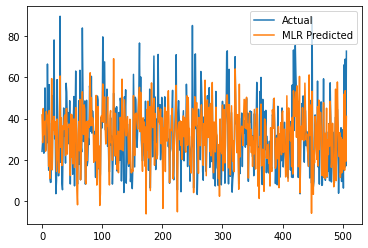

In [83]:
# write the function for the MLR model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_mlr_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the MLR model
mlr_model, mlr_yhat = build_mlr_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
plt.plot(y_test, label='Actual')
plt.plot(mlr_yhat, label='MLR Predicted')
plt.legend()

# Random Forest Model Training for Ashok Vihar

MSE: 74.13415
RMSE: 8.61012
R2: 0.74566


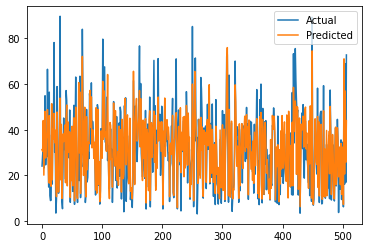

In [82]:

# write the function for the Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def build_rf_model(X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    mse = mean_squared_error(y_test, yhat)
    print('MSE: %.5f' % mse)
    rmse = sqrt(mse)
    print('RMSE: %.5f' % rmse)
    # R2 score
    r2 = r2_score(y_test, yhat)
    print('R2: %.5f' % r2)
    return model, yhat

# build the Random Forest model
rf_model, rf_yhat = build_rf_model(X_train, y_train, X_test, y_test)

# plot yhat and y_split_test
# plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual')
plt.plot(rf_yhat, label='Predicted')
plt.legend()
